In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [141]:

r1=199./((10.292)*(10.235)) +95./((10.129)*(10.191))
r2=r1+94./((10.180)*(10.302))+200./((10.372)*(10.198))+197./((10.198)*(10.327))
r3=r2+194./((10.183)*(10.250))+203./((10.207)*(10.266))+95./((9.942)*(10.096))
r4=r3+114./((7.801)*(7.64))+112./((7.646)*(7.679))+59./((7.629)*(7.639))
r5=r4+58./((7.576)*(7.654))+58./((7.407)*(7.584))+57./((7.605)*(7.682))+58./((7.42)*(7.642))
r6=r5+59./((7.634)*(7.640))+58./((7.452)*(7.449))+59./((7.739)*(7.607))+60./((7.535)*(7.615))
r7=r6+1503./((9.877)*(9.751))

print(r1,r2,r3,r4,r5,r6,r7)


2.809468598910543 7.467192426596615 12.20961691069033 17.0423339879735 21.073585169588625 25.1779142972964 40.78366878999636


Fitted parameters: 6.176981199028568 0.11218409156642856 0.42514455656907496
Error in parameters: 0.09312289427869617 0.001540141218418429 0.008849607172571505


<Figure size 504x504 with 0 Axes>

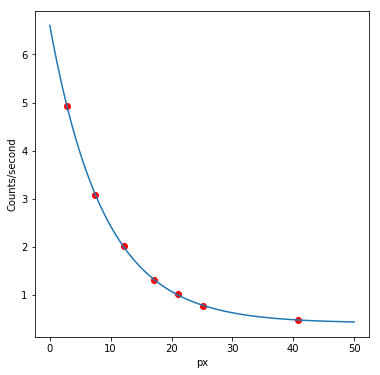

In [142]:
rho_x = np.array([r1,r2,r3,r4,r5,r6,r7])
time = np.array([203.,325.,497.,758.,977.,1280.,2044.])
counts=np.array([1002.,1001.,1002.,1002.,1001.,1001.,1001.])

I=counts/time

sigma_I = np.sqrt(counts)/time
def func(rho_x, a, b, c):
    return a * np.exp(-b * rho_x) + c

f = plt.figure(figsize=(7,7))
a0=4.8
b0=0.1
c0=0.387

popt,pcov = curve_fit(func,rho_x,I,p0=[a0,b0,c0],sigma=sigma_I)

da,db,dc = [np.sqrt(pcov[j, j]) for j in range(popt.size)]
a,b,c = popt
x = np.linspace(0,50,1000)  # I added this so your fitted curve appears continuous and smooth
f = plt.figure(figsize=(6,6))
plt.xlabel('px')
plt.ylabel('Counts/second')
plt.scatter(rho_x,I,color ='red')

plt.plot(x,func(x,a,b,c))
print('Fitted parameters:',a,b,c)
print('Error in parameters:',da,db,dc)


In [130]:
def func(rho_x):
    return 6.176959407204302 * np.exp(-0.11218373367638662 * rho_x) +0.42514385422022777
rho_x = np.array([r1,r2,r3,r4,r5,r6,r7])
time = np.array([203,325,497,758,977,1280,2044])
counts=np.array([1002,1001,1002,1002,1001,1001,1001])

I=counts/time

sigma_I=((counts)**1/2/time)
expected=I
P=func(rho_x)
chisqr = sum(((expected-P)**2)/(sigma_I)**2)
reducedchisqr=chisqr/3
print(chisqr)
print(reducedchisqr)


0.0031070425414517202
0.0010356808471505734


In [143]:
resids = I - func(rho_x,a,b,c)
chissqr = ((resids / sigma_I) ** 2).sum()
redchisqr = ((resids / sigma_I) ** 2).sum() / float(I.size-3)
alpha = chisqprob(chissqr,float(I.size-3))

print ('reduced chi-square:',redchisqr)
print ('confidence value',alpha)

NameError: name 'chisqprob' is not defined

([<matplotlib.axis.XTick at 0x1022da9a58>],
 <a list of 1 Text xticklabel objects>)

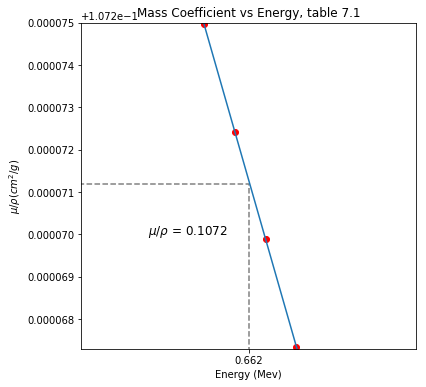

In [144]:
E = np.linspace(0.1022,1.022,100000)
E_list = np.array([0.1022,0.1277,0.1703,0.2554,0.3405,0.4086,0.5108,0.6811,1.022])
u_rho_list = np.array([5.3,2.97,1.45,0.558,0.300,0.214,0.149,0.102,0.0682])
u_rho = np.interp(E,E_list,u_rho_list)

u_rho = np.interp(E,E_list,u_rho_list)

f1 = plt.figure(figsize=(6,6))
plt.plot(E,u_rho)
plt.scatter(E,u_rho,color='red')
plt.ylim(.1072673,.107275)
plt.xlim(.66195,.66205)
plt.vlines(.66200,0,.1072712,linestyle='--',color='grey')
plt.hlines(.1072712,0,.662,linestyle='--',color='grey')
plt.text(.66197,.10727,'$\mu/\\rho$ = 0.1072',fontsize=12)
plt.title('Mass Coefficient vs Energy, table 7.1')
plt.ylabel('$\mu/\\rho (cm^2/g)$')
plt.xlabel('Energy (Mev)')
plt.xticks([.662])

